In [1]:
from load_modules import *
import copy



In [2]:
plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

def create_exp(x):
    return np.random.uniform(80,100)*np.exp(np.linspace(1,np.random.uniform(-1,-50),len(x))) 

def create_poly(x):
    max_power = np.random.randint(3,7)
    y = np.ones(x.shape) * np.random.uniform(20,40) + (max_power-1) * 30
    for power in range(1, max_power):
        y -= np.linspace(-1,1,len(x))**power * np.random.uniform(20,40)
    return y

def create_gaus(x):
    mu = np.random.uniform(600,800) * (end-start) / steps
    sigma = np.random.uniform(200,500)
    return np.exp(-0.5* ((x - mu)**2 / sigma**2)) * np.random.uniform(20,40)

def norm(e):
    return (e - np.min(e)) / (np.max(e) - np.min(e))

end = 2000
start = 80
steps = 1250
n = end-start
x = np.linspace(start, end, steps)


raw_lst = []
def create_dummy_spectra(expo=True, poly=True, gaus=True, raman=True):
    global raw_lst
    raw_lst = []
    for _ in range(100):
        photo  = np.zeros(x.shape)
        if expo:
            photo += create_exp(x)
        if poly:
            photo += create_poly(x)
        if gaus:
            photo += create_gaus(x)
        photo -= min(-5, np.min(photo))
        raw = copy.copy(photo)
                
        if raman:
            for _ in range(20):
                FWHM_spike = np.random.uniform(7,80)
                raman_mu = int(n*np.random.uniform(0.1,0.9))
                raw +=  np.random.uniform(5,10) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
            for _ in range(10):
                FWHM_spike = np.random.uniform(7,40)
                raman_mu = int(n*np.random.uniform(0.1,0.9))
                raw +=  np.random.uniform(10,20) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
            for _ in range(6):
                FWHM_spike = np.random.uniform(7,40)
                raman_mu = int(n*np.random.uniform(0.1,0.9))
                raw +=  np.random.uniform(20,80) * LSQ.gaussian(x, np.array([raman_mu]), np.array([FWHM_spike / (2 * np.sqrt(2 * np.log(2)))])).reshape(-1)
        
        raw += np.random.random(x.shape) * 5
        raw_lst.append((raw, photo))
    raw_lst = np.array(raw_lst)

# create_dummy_spectra(expo=True, poly=True, gaus=True, raman=True)
# for raw, p in raw_lst:
#     plt.plot(x, raw)
#     plt.plot(x,p)
#     plt.xlim(start,end)
#     plt.ylim(0)
#     plt.ylabel("intensity (-)")
#     plt.xlabel(r"wavenumbers ($cm^{-1}$)")
#     plt.show()

In [3]:
create_dummy_spectra(expo=True, poly=True, gaus=True, raman=True)

In [54]:
plt.rcParams['figure.figsize'] = (14.0, 3.0)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['lines.linewidth'] = 1

error_lst = []
error_lst2 = []
error_lst3 = []

segment_width_lst = np.linspace(0,700,15)
# segment_width_lst = [0,450,700]
for segment_width in segment_width_lst:
    e = []
    e2 = []
    e3 = []
    if not segment_width:
        split = splitting.preliminary_split(x, size=x.shape[0], FWHM=400)
    else:
        split = splitting.split(x, size=x.shape[0], FWHM=400, segment_width=segment_width, algorithm="Bezier curve")
    for j, (raw, real_photo) in enumerate(raw_lst):
        photo = split(raw.reshape(1,-1))
        e += [error.MSE(photo[0], real_photo)]
        e2 += [error.TMSGE(photo[0], real_photo)]
        e3 += [error.MSGE(photo[0]) - error.MSGE(real_photo)]
#         if j == 8:
#         print(f"j:{j} iter")
#         plt.plot(x, raw, label="raw")
#         plt.plot(x, photo.reshape(-1), label="appr")
#         plt.plot(x, real_photo, label="photo")
#         plt.ylim(0)
#         plt.xlim(start, end)
#         plt.legend()
#         plt.show()
    e = np.mean(e) 
    e2 = np.mean(e2)
    e3 = np.mean(e3)
    error_lst.append(e)
    error_lst2.append(e2)
    error_lst3.append(e3)
    print(f"segment_width: {segment_width},\t error: {e}, \t smoothness: {e2}, \t smoothness: {e3}")
#     plt.plot(x, raw, label="raw")
#     plt.plot(x, photo.reshape(-1), label="appr")
#     plt.plot(x, real_photo, label="photo")
#     plt.ylim(0)
#     plt.xlim(start, end)
#     plt.legend()
#     plt.show()
    
error_lst = np.array(error_lst)
error_lst2 = np.array(error_lst2)
error_lst3 = np.array(error_lst3)

segment_width: 0.0,	 error: 7.532564575354129, 	 smoothness: 0.006832856278951472, 	 smoothness: -0.03150403676524898
segment_width: 50.0,	 error: 6.475217084175045, 	 smoothness: 0.005007578733661266, 	 smoothness: -0.020550389063737913
segment_width: 100.0,	 error: 5.670335964616343, 	 smoothness: 0.0038768609747027714, 	 smoothness: -0.01101799274949673
segment_width: 150.0,	 error: 5.096146387255905, 	 smoothness: 0.0031264220550849316, 	 smoothness: -0.0071239113169738934
segment_width: 200.0,	 error: 4.919114618656537, 	 smoothness: 0.0026599572886906783, 	 smoothness: -0.008637954584431602
segment_width: 250.0,	 error: 4.864058776488498, 	 smoothness: 0.0025308343216378514, 	 smoothness: -0.008956599320662072
segment_width: 300.0,	 error: 4.423326682681253, 	 smoothness: 0.0024149738419688037, 	 smoothness: -0.009311272850881139
segment_width: 350.0,	 error: 4.079000785561729, 	 smoothness: 0.002558989794184235, 	 smoothness: -0.009592023998543529
segment_width: 400.0,	 error: 3

In [58]:
# error_lst1a = error_lst[::2]
# error_lst1b = error_lst[1::2]

# error_lst2a = error_lst2[::2]
# error_lst2b = error_lst2[1::2]

error_lst3c = np.abs(error_lst3)
# error_lst3a = error_lst3c[::2]
# error_lst3b = error_lst3c[1::2]

error_lst1a = error_lst
error_lst2a = error_lst2
error_lst3a = error_lst3c

In [66]:
error_check1 = np.log(error_lst1a)
error_check2 = np.log(error_lst2a)
error_check3 = np.log(error_lst3a)
# error_check1 = (error_lst1a)
# error_check2 = (error_lst2a)
# error_check3 = (error_lst3a)

error_check1 = norm(error_check1)
error_check2 = norm(error_check2)
error_check3 = norm(error_check3)

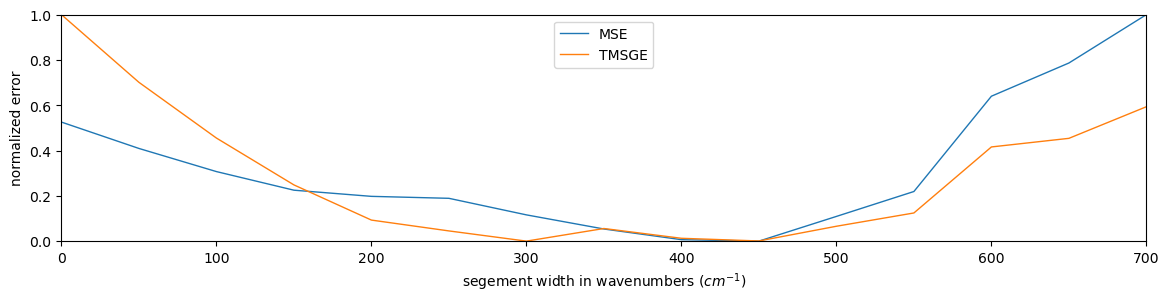

In [77]:
plt.plot(segment_width_lst, error_check1, label="MSE")
plt.plot(segment_width_lst, error_check2, label="TMSGE")
plt.ylim(0,1)
plt.xlim(0,700)
plt.legend(loc=9)
plt.xlabel(r"segement width in wavenumbers ($cm^{-1}$)")
plt.ylabel(r"normalized error")
plt.show()